In [1]:
from numpy import frompyfunc, linspace, sqrt, exp, log, pi, zeros, arange
from mpmath import polylog
from scipy.integrate import quad
from pylab import cm
from matplotlib.ticker import AutoMinorLocator

# Specific treatment for polylogarithm function
plog = frompyfunc(polylog, 2, 1)

# Call plotting library
import matplotlib as mpl
import matplotlib.pyplot as plt

# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 22
plt.rcParams['axes.linewidth'] = 2

# Generate 2 colors from the 'Set1' colormap
colors = mpl.colormaps['tab10'](2)

infty = 100
T = 300 #Temperature in K
kB = 0.00008617 #Bolztman constant in eV/K
kBT = kB*T
f = 10 #Conduction 17.40867685
Deltac = 0.01 #Conduction -0.08040215
a = 17 #mexican 17
b = 5000 #5000
#a = 7.2
#b = 690
d = 0.03 #Mexican 0.03
db = d/kBT
Dc = Deltac/kBT
E0 = (a**2)/(4*b*kBT) + db

In [2]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import sys

#This function extracts the high symmetry points from the output of bandx.out
def Symmetries(fstring): 
  f = open(fstring,'r')
  x = np.zeros(0)
  for i in f:
    if "high-symmetry" in i:
      x = np.append(x,float(i.split()[-1]))
  f.close()
  return x
# This function takes in the datafile, the fermi energy, the symmetry file, a subplot, and the label
# It then extracts the band data, and plots the bands, the fermi energy in red, and the high symmetry points
def bndplot(datafile,fermi,symmetryfile,subplot,**kwargs):
  ## necessary:
  # datafile is the bands.dat.gnu file generated from band.x
  # fermi is the Fermi energy
  # symmetryfile is the standard output file of band.x (bands.pp.out)
  # subplot is the axes that you want to plot the band on

  ## optional:
  # use name_k_points=['L','G','X','U','G'] where G is Gamma point to label the high symmetry points. It must have the same length as the variable 'temp'
  # use shift_fermi=1 to shift the Fermi energy to zero
  # use color='black' to manually set the color of the band structure plot. Useful to plot two band structure together for comparison
  # use linestyle='dashed' to manually set the linestyle of the band structure plot. Useful to plot two band structure together for comparison
  # use range=[-5,5] to set the energy range for plotting the band structure
  # use legend='Si, PBE' to set the legend of the bands

  if 'shift_fermi' in kwargs:
    bool_shift_efermi = kwargs['shift_fermi']
  else:
    bool_shift_efermi = 0
  if 'color' in kwargs:
    color_bnd=kwargs['color']
  else:
    color_bnd='black'
  if 'linestyle' in kwargs:
    line_bnd=kwargs['linestyle']
  else:
    line_bnd='solid'
  
  z = np.loadtxt(datafile) #This loads the bandx.dat.gnu file
  x = np.unique(z[:,0]) #This is all the unique x-points
  bands = []
  bndl = len(z[z[:,0]==x[1]]) #This gives the number of bands in the calculation
  Fermi = float(fermi)
  if bool_shift_efermi:
    fermi_shift=Fermi
  else:
    fermi_shift=0
  axis = [min(x),max(x)]
  for i in range(0,bndl):
    bands.append(np.zeros([len(x),2])) #This is where we storre the bands
  for i in range(0,len(x)):
    sel = z[z[:,0] == x[i]]  #Here is the energies for a given x
    test = []
    for j in range(0,bndl): #This separates it out into a single band
      bands[j][i][0] = x[i]
      #bands[j][i][1] = np.multiply(sel[j][1],13.605698066)
      bands[j][i][1] = sel[j][1]
  for i in bands: #Here we plots the bands
    subplot.plot(i[:,0],i[:,1]-fermi_shift,color=color_bnd,linestyle=line_bnd)
  if 'legend' in kwargs:
    #empty plot to generate legend
    subplot.plot([None],[None],color=color_bnd,linestyle=line_bnd,label=kwargs['legend'])
  temp = Symmetries(symmetryfile)
  for j in temp: #This is the high symmetry lines
    x1 = [j,j]
    #x2 = [fermi-10,fermi+10]
    #subplot.plot(x1,x2,'--',lw=0.55,color='black',alpha=0.75)
    subplot.axvline(x=j,linestyle='solid',color='gray',alpha=0.5)
  subplot.plot([min(x),max(x)],[Fermi-fermi_shift,Fermi-fermi_shift],color='red',linestyle='dotted')
  subplot.set_xticks(temp)
  subplot.set_xticklabels([])
  if 'name_k_points' in kwargs:
    if len(kwargs['name_k_points'])==len(temp):
      subplot.set_xticklabels(kwargs['name_k_points'])
  if 'range' in kwargs:
    range_plot=kwargs['range']
    subplot.set_ylim([range_plot[0],range_plot[1]])
  subplot.set_xlim([axis[0],axis[1]])
  subplot.set_xlabel('k')
  subplot.set_ylabel('energy (eV)')
  if 'legend' in kwargs:
    subplot.legend()
  return bands

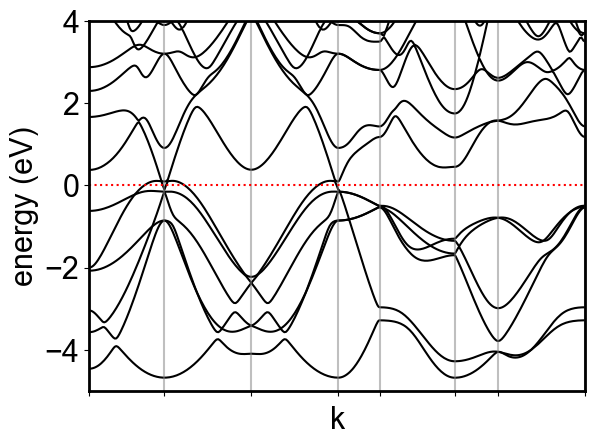

In [3]:
datafile='../Bands/Mg3Bi2.bands.gnu'
fermi = 7.3124
#fermi = 7.5
symmetryfile='../Bands/Mg3Bi2.bands.out'
bool_shift_efermi= True
fig, ax = plt.subplots()

#bndplot(datafile,fermi,symmetryfile,ax)
band = bndplot(datafile,fermi,symmetryfile,ax,shift_fermi=bool_shift_efermi,color='black',linestyle='solid',range=[-5,4])

kc = band[30][:,0][30:80]
Ekc = band[30][:,1][30:80] 
kv = band[29][:,0][30:80]
Ekv = band[29][:,1][30:80]

#kvv = np.append(kv[100:150]-1.574,kv[0:50])
#Ekvv = np.append(Ekv[100:150],Ekv[0:50])
#kcc = np.append(kc[100:150]-1.574,kc[0:50])
#Ekcc = np.append(Ekc[100:150],Ekc[0:50])

kvv = np.append(kv[0:21]-0.5774,kc[21:50]-0.5774)
Ekvv = np.append(Ekv[0:21],Ekv[21:50])
kc_append= np.append(kc[0:19]-0.5774, kv[19:22]-0.5774)
kcc = np.append(kc_append,kc[22:50]-0.5774)
#kcc = np.append(kc[0:21]-0.5774,kc[21:50]-0.5774)
Ekc_append= np.append(Ekc[0:19], Ekv[19:22])
Ekcc = np.append(Ekc_append,Ekc[22:50])
#Ekcc = np.append(Ekc[0:21],Ekc[21:50])


#Print length of each array
#print(len(kc))
#print(len(Ekc))
#print(len(kv))
#print(len(Ekv))


#Finding number of columns
#num_columns = len(band[30][0])
#print("Number of columns:", num_columns)

(-0.2, 0.8)

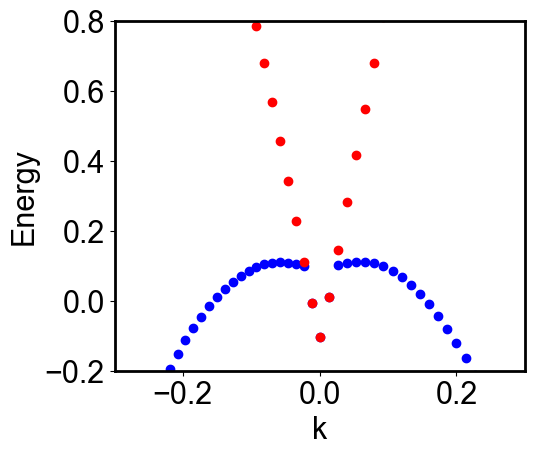

In [4]:
fig=plt.figure(figsize=(18,10))

#Plotting Type-II NLS bands crossing
ax=fig.add_subplot(2,3,1)
ax.scatter(kvv, Ekvv-fermi, color='blue')
ax.scatter(kcc, Ekcc-fermi, color='red')
ax.set_xlabel('k')
ax.set_ylabel('Energy')
ax.set_xlim(-0.3,0.3)
ax.set_ylim(-0.2,0.8)

#Plotting Type-II NLS bands crossing (appendages)
#ax1=fig.add_subplot(2,3,2)
#ax1.plot(kvv, Ekvv-fermi, color='blue', label='Band 15')
#ax1.plot(kcc, Ekcc-fermi, color='red', label='Band 16')
#ax1.set_xlabel('k')
#ax1.set_xlim(0.35,0.85)
#ax1.set_ylim(-0.2,0.2)


In [5]:
#Reshapong the 1xN array into Nx1 array
kv_r=np.reshape(kv, (len(kv), 1))
Ekv_r=np.reshape(Ekv,(len(Ekv), 1))
kc_r=np.reshape(kc, (len(kc), 1))
Ekc_r=np.reshape(Ekc, (len(Ekc), 1))

kvv_r=np.reshape(kvv, (len(kvv), 1))
Ekvv_r=np.reshape(Ekvv, (len(Ekvv), 1))
kcc_r=np.reshape(kcc, (len(kcc), 1))
Ekcc_r=np.reshape(Ekcc, (len(Ekcc), 1))

#Concatenating the array
conct=np.hstack((kv_r, Ekv_r-fermi, kc_r, Ekc_r-fermi))
conct_appendC=np.hstack((kcc_r, Ekcc_r-fermi))
conct_appendV=np.hstack((kvv_r, Ekvv_r-fermi))
#conct_append=np.hstack((kvv_r, Ekvv_r-fermi, kcc_r, Ekcc_r-fermi))


#Specifying the file name and format
file_out='Fitting.csv'
file_appendC='appendage_cond.csv'
file_appendV='appendage_val.csv'
#file_append='appendage.csv'

# Adding header text
hdr_txt='kv, Ekv, kc, Ekc'
hdr_appendC='kcc, Ekcc'
hdr_appendV='kvv, Ekvv'
#hdr_append='kvv, Ekvv, kc, Ekcc'

#Saving the array to a text file with a specific format and precision
np.savetxt(file_out, conct, fmt='%.4f', header=hdr_txt, delimiter='\t' )
np.savetxt(file_appendC, conct_appendC, fmt='%.4f', header=hdr_appendC, delimiter='\t')
np.savetxt(file_appendV, conct_appendV, fmt='%.4f', header=hdr_appendV, delimiter='\t')
#np.savetxt(file_append, conct_append, fmt='%.4f', header=hdr_append, delimiter='\t')


[6.27630557]


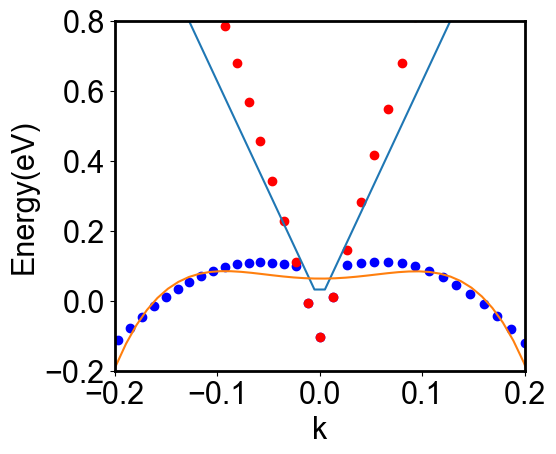

In [6]:
from scipy.optimize import curve_fit

fig=plt.figure(figsize=(18,10))

ax=fig.add_subplot(2,3,1)
ax.scatter(kvv, Ekvv-fermi, color='blue')
ax.scatter(kcc, Ekcc-fermi, color='red')
ax.set_xlabel('k')
ax.set_ylabel('Energy(eV)')
ax.set_xlim(-0.2,0.2)
ax.set_ylim(-0.2,0.8)

#--------------------------------------------------------------------
#Interpolation
#--------------------------------------------------------------------

# Specify the point where you want to determine the value
#dsrd_kvv = 0.577   #Lowest point of valence bands
#dsrd_kcc= 0.912

# Find the corresponding highest y-value
#dsrd_Ekvv = np.interp(dsrd_kvv, kvv, Ekvv-fermi) #interpolation to determine max value of conduction bands
#dsrd_Ekcc = np.interp(dsrd_kcc, kcc, Ekcc-fermi,)

# Mark the point on the graph with an annotation
#ax.scatter(dsrd_kvv, dsrd_Ekvv, color='black')      #Marking the point
#ax.annotate(f'({dsrd_kvv:.3f}, {dsrd_Ekvv:.3f})', #add a text annotation at that point
#             xy=(dsrd_kvv, dsrd_Ekvv),
#             xytext=(dsrd_kvv-0.2, dsrd_Ekvv),
#             arrowprops=dict(facecolor='black', arrowstyle='->'),
#             fontsize='12',
#             )

#ax.scatter(dsrd_kcc, dsrd_Ekcc, color='black')  
#ax.annotate(f'({dsrd_kcc:.2f}, {dsrd_Ekvv:.3f})', 
#             xy=(dsrd_kcc, dsrd_Ekcc),
#             xytext=(dsrd_kcc, dsrd_Ekcc+0.2),
#             arrowprops=dict(facecolor='black', arrowstyle='->'),
#             fontsize='12',
#             )

#print(len(kcc))
#print((kcc[0],Ekcc[0]))
#print((kcc[23],Ekcc[23]))

#--------------------------------------------------------------------
#Curve Fitting
#--------------------------------------------------------------------

#Define a function

#Dirac band 

def DEc(k,vF):
    return vF*np.abs(k)

#def DEc(k,vF):
#    return vF*k

#Mexican-hat  band

#def DEv(k,q,E_0,E_1):
#    return (q**2*k**4)/(E_1)-2*q*k**2+E_1+E_0

#def DEv(k,q,E_0,E1):
#    return -(k**4)/(16*q**2*E1)-2*k**2/(4*q)-E1+E_0

#def DEv(k,a,b,c,d,e):
#   return -a*k**4 + b*k**3-c*k**2+d*k-e

def DEv(k,mh,mh1,mh2,mh3,mh4):
    return mh*k**4+mh1*k**3+mh2*k**2+mh3*k+mh4

#Determining E1

#E1=-(min(Ekcc)-max(Ekvv))
#print(E1)
#Fitting

#Dirac band
c_opt,c_cov= curve_fit(DEc, kcc, Ekcc-fermi)
print(c_opt)

#Mexican-hat band
#v_opt,v_cov= curve_fit(DEv, kvv, Ekvv-fermi)
#print(v_opt)
#Plotting fitted parameters
xfit=np.linspace(-0.25, 0.25, 50)
ax.plot(xfit, DEc(xfit, *c_opt))
#ax.plot(xfit, DEv(xfit, *v_opt))
ax.plot(xfit, DEv(xfit, -279.08, 1.0134, 4.854, -0.012, 0.0632))

# Calculate the R-squared value

#Conduction band
#rsds_cond = (Ekcc-fermi) - DEc(xfit, *c_opt) 
#cond_res = np.sum(rsds_cond**2)
#cond_tot = np.sum((Ekcc - np.mean(Ekcc))**2)
#r_sqrC = 1 - (cond_res / cond_tot)
#print("R-squared:", r_sqrC, "(Conduction Band)")

#Valence band
#rsds_val = (Ekvv-fermi) - DEv(xfit, *v_opt) 
#val_res = np.sum(rsds_val**2)
#val_tot = np.sum((Ekvv - np.mean(Ekvv))**2)
#r_sqrV = 1 - (val_res / val_tot)
#print("R-squared:", r_sqrV, "(Valence Band)")



In [ ]:
mm  = 0.145
#mm1 = 0.190
#mm2 = 0.235
#mm3 = 0.280
#mm4 = 0.325
#mm5 = 0.370
#mm6 = 0.415
a = 1/(2*mm)
#a1 = 1/(2*mm1)
#a2 = 1/(2*mm2)
#a3 = 1/(2*mm3)
#a4 = 1/(2*mm4)
#a5 = 1/(2*mm5)
#a6 = 1/(2*mm6)

v = 9.95
#v1 = 8.00
#v2 = 11.90
#v3 = 13.85
#v4 = 15.8
#v5 = 17.75
#v6 = 19.7

## Using CRTA
alpha = v**2/(4*a)/(kBT)
#alpha1 = v1**2/(4*a1)/(kBT)
#alpha2 = v2**2/(4*a2)/(kBT)
#alpha3 = v3**2/(4*a3)/(kBT)
#alpha4 = v4**2/(4*a4)/(kBT)
#alpha5 = v5**2/(4*a5)/(kBT)
#alpha6 = v6**2/(4*a6)/(kBT)

#def L0c(xx,E0,E1,alpha_var):
#    def integrand1(x,xx):
#        return  (x+xx)**2*(exp(x) / (exp(x)+1)**2)
#    I1, error = quad(integrand1, -xx, infty, args=(xx))
#    return (I1)/(4*sqrt(2*alpha_var))
#
#def L1c(xx,E0,E1,alpha_var):
#    def integrand1(x,xx):
#        return  (x+xx)**2*(exp(x) / (exp(x)+1)**2)*x
#    I1, error = quad(integrand1, -xx, infty, args=(xx))
#    return (I1)/(4*sqrt(2*alpha_var))
#
#def L2c(xx,E0,E1,alpha_var):
#    def integrand1(x,xx):
#        return  (x+xx)**2*(exp(x) / (exp(x)+1)**2)*(x**2)
#    I1, error = quad(integrand1, -xx, infty, args=(xx))
#    return (I1)/(4*sqrt(2*alpha_var))
#
#def L0vout(xx,E0,E1):
#    def integrand1(x,xx):
#        return  E1*sqrt(E0-x-xx)*(1+sqrt((E0-x-xx)/E1))**(3/2)*(exp(x) / (exp(x)+1)**2)
#    I1, error = quad(integrand1, -infty, E0-xx, args=(xx))
#    return (I1)
#
#def L1vout(xx,E0,E1):
#    def integrand1(x,xx):
#        return  E1*sqrt(E0-x-xx)*(1+sqrt((E0-x-xx)/E1))**(3/2)*x*(exp(x) / (exp(x)+1)**2)
#    I1, error = quad(integrand1, -infty, E0-xx, args=(xx))
#    return (I1)
#
#def L2vout(xx,E0,E1):
#    def integrand1(x,xx):
#        return  E1*sqrt(E0-x-xx)*(1+sqrt((E0-x-xx)/E1))**(3/2)*x**2*(exp(x) / (exp(x)+1)**2)
#    I1, error = quad(integrand1, -infty, E0-xx, args=(xx))
#    return (I1)
#
#def L0vin(xx,E0,E1):
#    def integrand3(x,xx):
#        return E1*sqrt(E0-x-xx)*(1-sqrt((E0-x-xx)/E1))**(3/2)*(exp(x) / (exp(x)+1)**2)
#    I3,error = quad(integrand3, E0-E1-xx, E0-xx, args=(xx))
#    return (I3)
#
#def L1vin(xx,E0,E1):
#    def integrand3(x,xx):
#        return x*E1*sqrt(E0-x-xx)*(1-sqrt((E0-x-xx)/E1))**(3/2)*(exp(x) / (exp(x)+1)**2)
#    I3,error = quad(integrand3, E0-E1-xx, E0-xx, args=(xx))
#    return (I3)
#
#def L2vin(xx,E0,E1):
#    def integrand3(x,xx):
#        return x**2*E1*sqrt(E0-x-xx)*(1-sqrt((E0-x-xx)/E1))**(3/2)*(exp(x) / (exp(x)+1)**2)
#    I3,error = quad(integrand3, E0-E1-xx, E0-xx, args=(xx))
#    return (I3)
#
#def S_c(x,W1,W2):
#    sc = zeros(x.size)
#    for i in range(x.size):
#        sc[i] = -L1c(x[i],W1,W2,alpha)/L0c(x[i],W1,W2,alpha)
#    return sc
#
#def S_c1(x,W1,W2):
#    sc = zeros(x.size)
#    for i in range(x.size):
#        sc[i] = -L1c(x[i],W1,W2,alpha1)/L0c(x[i],W1,W2,alpha1)
#    return sc
#
#def S_c2(x,W1,W2):
#    sc = zeros(x.size)
#    for i in range(x.size):
#        sc[i] = -L1c(x[i],W1,W2,alpha2)/L0c(x[i],W1,W2,alpha2)
#    return sc
#
#def S_c3(x,W1,W2):
#    sc = zeros(x.size)
#    for i in range(x.size):
#        sc[i] = -L1c(x[i],W1,W2,alpha3)/L0c(x[i],W1,W2,alpha3)
#    return sc
#
#def S_c4(x,W1,W2):
#    sc = zeros(x.size)
#    for i in range(x.size):
#        sc[i] = -L1c(x[i],W1,W2,alpha4)/L0c(x[i],W1,W2,alpha4)
#    return sc
#
#def S_c5(x,W1,W2):
#    sc = zeros(x.size)
#    for i in range(x.size):
#        sc[i] = -L1c(x[i],W1,W2,alpha5)/L0c(x[i],W1,W2,alpha5)
#    return sc
#
#def S_c6(x,W1,W2):
#    sc = zeros(x.size)
#    for i in range(x.size):
#        sc[i] = -L1c(x[i],W1,W2,alpha6)/L0c(x[i],W1,W2,alpha6)
#    return sc
#
#def sigma_c(x,W1,W2):
#    sgm = zeros(x.size)
#    for i in range(x.size):
#        sgm[i] = L0c(x[i],W1,W2,alpha)
#    return sgm
#
#def sigma_c1(x,W1,W2):
#    sgm = zeros(x.size)
#    for i in range(x.size):
#        sgm[i] = L0c(x[i],W1,W2,alpha1)
#    return sgm
#
#def sigma_c2(x,W1,W2):
#    sgm = zeros(x.size)
#    for i in range(x.size):
#        sgm[i] = L0c(x[i],W1,W2,alpha2)
#    return sgm
#
#def sigma_c3(x,W1,W2):
#    sgm = zeros(x.size)
#    for i in range(x.size):
#        sgm[i] = L0c(x[i],W1,W2,alpha3)
#    return sgm
#
#def sigma_c4(x,W1,W2):
#    sgm = zeros(x.size)
#    for i in range(x.size):
#        sgm[i] = L0c(x[i],W1,W2,alpha4)
#    return sgm
#
#def sigma_c5(x,W1,W2):
#    sgm = zeros(x.size)
#    for i in range(x.size):
#        sgm[i] = L0c(x[i],W1,W2,alpha5)
#    return sgm
#
#def sigma_c6(x,W1,W2):
#    sgm = zeros(x.size)
#    for i in range(x.size):
#        sgm[i] = L0c(x[i],W1,W2,alpha6)
#    return sgm
#
#def kappa_c(x,W1,W2):
#    kpp = zeros(x.size)
#    for i in range(x.size):
#        kpp[i] = (L2c(x[i],W1,W2,alpha)-(L1c(x[i],W1,W2,alpha)**2/L0c(x[i],W1,W2,alpha)))
#    return kpp
#
#def kappa_c1(x,W1,W2):
#    kpp = zeros(x.size)
#    for i in range(x.size):
#        kpp[i] = (L2c(x[i],W1,W2,alpha1)-(L1c(x[i],W1,W2,alpha1)**2/L0c(x[i],W1,W2,alpha1)))
#    return kpp
#
#def kappa_c2(x,W1,W2):
#    kpp = zeros(x.size)
#    for i in range(x.size):
#        kpp[i] = (L2c(x[i],W1,W2,alpha2)-(L1c(x[i],W1,W2,alpha2)**2/L0c(x[i],W1,W2,alpha2)))
#    return kpp
#
#def kappa_c3(x,W1,W2):
#    kpp = zeros(x.size)
#    for i in range(x.size):
#        kpp[i] = (L2c(x[i],W1,W2,alpha3)-(L1c(x[i],W1,W2,alpha3)**2/L0c(x[i],W1,W2,alpha3)))
#    return kpp
#
#def kappa_c4(x,W1,W2):
#    kpp = zeros(x.size)
#    for i in range(x.size):
#        kpp[i] = (L2c(x[i],W1,W2,alpha4)-(L1c(x[i],W1,W2,alpha4)**2/L0c(x[i],W1,W2,alpha4)))
#    return kpp
#
#def kappa_c5(x,W1,W2):
#    kpp = zeros(x.size)
#    for i in range(x.size):
#        kpp[i] = (L2c(x[i],W1,W2,alpha5)-(L1c(x[i],W1,W2,alpha5)**2/L0c(x[i],W1,W2,alpha5)))
#    return kpp
#
#def kappa_c6(x,W1,W2):
#    kpp = zeros(x.size)
#    for i in range(x.size):
#        kpp[i] = (L2c(x[i],W1,W2,alpha6)-(L1c(x[i],W1,W2,alpha6)**2/L0c(x[i],W1,W2,alpha6)))
#    return kpp
#
#def S_v(x,W1,W2):
#    sc = zeros(x.size)
#    for i in range(x.size):
#        sc[i] = -(L1vin(x[i],W1,W2)+L1vout(x[i],W1,W2))/(L0vin(x[i],W1,W2)+L0vout(x[i],W1,W2))
#    return sc
#
#def sigma_v(x,W1,W2):
#    sgm = zeros(x.size)
#    for i in range(x.size):
#        sgm[i] = L0vin(x[i],W1,W2)+L0vout(x[i],W1,W2)
#    return sgm
#
#def kappa_v(x,W1,W2):
#    kpp = zeros(x.size)
#    for i in range(x.size):
#        kpp[i] = L2vin(x[i],W1,W2)+L2vout(x[i],W1,W2)-((L1vin(x[i],W1,W2)+L1vout(x[i],W1,W2))
#                **2/(L0vin(x[i],W1,W2)+L0vout(x[i],W1,W2)))
#    return kpp
#
#def sigma(x,W1,W2):
#    return sigma_c(x,W1,W2)+sigma_v(x,W1,W2)
#
#def sigma1(x,W1,W2):
#    return sigma_c1(x,W1,W2)+sigma_v(x,W1,W2)
#
#def sigma2(x,W1,W2):
#    return sigma_c2(x,W1,W2)+sigma_v(x,W1,W2)
#
#def sigma3(x,W1,W2):
#    return sigma_c3(x,W1,W2)+sigma_v(x,W1,W2)
#
#def sigma4(x,W1,W2):
#    return sigma_c4(x,W1,W2)+sigma_v(x,W1,W2)
#
#def sigma5(x,W1,W2):
#    return sigma_c5(x,W1,W2)+sigma_v(x,W1,W2)
#
#def sigma6(x,W1,W2):
#    return sigma_c6(x,W1,W2)+sigma_v(x,W1,W2)
#
#
#def S(x,W1,W2):
#    return (sigma_c(x,W1,W2)*S_c(x,W1,W2)+sigma_v(x,W1,W2)*S_v(x,W1,W2))/sigma(x,W1,W2)
#
#def S1(x,W1,W2):
#    return (sigma_c1(x,W1,W2)*S_c1(x,W1,W2)+sigma_v(x,W1,W2)*S_v(x,W1,W2))/sigma1(x,W1,W2)
#
#def S2(x,W1,W2):
#    return (sigma_c2(x,W1,W2)*S_c2(x,W1,W2)+sigma_v(x,W1,W2)*S_v(x,W1,W2))/sigma2(x,W1,W2)
#
#def S3(x,W1,W2):
#    return (sigma_c3(x,W1,W2)*S_c3(x,W1,W2)+sigma_v(x,W1,W2)*S_v(x,W1,W2))/sigma3(x,W1,W2)
#
#def S4(x,W1,W2):
#    return (sigma_c4(x,W1,W2)*S_c4(x,W1,W2)+sigma_v(x,W1,W2)*S_v(x,W1,W2))/sigma4(x,W1,W2)
#
#def S5(x,W1,W2):
#    return (sigma_c5(x,W1,W2)*S_c5(x,W1,W2)+sigma_v(x,W1,W2)*S_v(x,W1,W2))/sigma5(x,W1,W2)
#
#def S6(x,W1,W2):
#    return (sigma_c6(x,W1,W2)*S_c6(x,W1,W2)+sigma_v(x,W1,W2)*S_v(x,W1,W2))/sigma6(x,W1,W2)
#
#def kappa(x,W1,W2):
#    return kappa_c(x,W1,W2)+kappa_v(x,W1,W2)+(sigma_c(x,W1,W2)*sigma_v(x,W1,W2)*(S_c(x,W1,W2)
#            -S_v(x,W1,W2))**2)/sigma(x,W1,W2)
#
#def kappa1(x,W1,W2):
#    return kappa_c1(x,W1,W2)+kappa_v(x,W1,W2)+(sigma_c1(x,W1,W2)*sigma_v(x,W1,W2)*(S_c1(x,W1,W2)
#            -S_v(x,W1,W2))**2)/sigma1(x,W1,W2)
#
#def kappa2(x,W1,W2):
#    return kappa_c2(x,W1,W2)+kappa_v(x,W1,W2)+(sigma_c2(x,W1,W2)*sigma_v(x,W1,W2)*(S_c2(x,W1,W2)
#            -S_v(x,W1,W2))**2)/sigma2(x,W1,W2)
#
#def kappa3(x,W1,W2):
#    return kappa_c3(x,W1,W2)+kappa_v(x,W1,W2)+(sigma_c3(x,W1,W2)*sigma_v(x,W1,W2)*(S_c3(x,W1,W2)
#            -S_v(x,W1,W2))**2)/sigma3(x,W1,W2)
#
#def kappa4(x,W1,W2):
#    return kappa_c4(x,W1,W2)+kappa_v(x,W1,W2)+(sigma_c4(x,W1,W2)*sigma_v(x,W1,W2)*(S_c4(x,W1,W2)
#            -S_v(x,W1,W2))**2)/sigma4(x,W1,W2)
#
#def kappa5(x,W1,W2):
#    return kappa_c5(x,W1,W2)+kappa_v(x,W1,W2)+(sigma_c5(x,W1,W2)*sigma_v(x,W1,W2)*(S_c5(x,W1,W2)
#            -S_v(x,W1,W2))**2)/sigma1(x,W1,W2)
#
#def kappa6(x,W1,W2):
#    return kappa_c6(x,W1,W2)+kappa_v(x,W1,W2)+(sigma_c6(x,W1,W2)*sigma_v(x,W1,W2)*(S_c6(x,W1,W2)
#            -S_v(x,W1,W2))**2)/sigma6(x,W1,W2)
#
#def PF(Sc,Sgm):
#    return (Sc**2)*Sgm
#
#def ZT(x,W1,W2):
#    return (S(x,W1,W2)**2 * sigma(x,W1,W2))/(kappa(x,W1,W2))
#
#def ZT1(x,W1,W2):
#    return (S1(x,W1,W2)**2 * sigma1(x,W1,W2))/(kappa1(x,W1,W2))
#
#def ZT2(x,W1,W2):
#    return (S2(x,W1,W2)**2 * sigma2(x,W1,W2))/(kappa2(x,W1,W2))
#
#def ZT3(x,W1,W2):
#    return (S3(x,W1,W2)**2 * sigma3(x,W1,W2))/(kappa3(x,W1,W2))
#
#def ZT4(x,W1,W2):
#    return (S4(x,W1,W2)**2 * sigma4(x,W1,W2))/(kappa4(x,W1,W2))
#
#def ZT5(x,W1,W2):
#    return (S5(x,W1,W2)**2 * sigma5(x,W1,W2))/(kappa5(x,W1,W2))
#
#def ZT6(x,W1,W2):
#    return (S6(x,W1,W2)**2 * sigma6(x,W1,W2))/(kappa6(x,W1,W2))

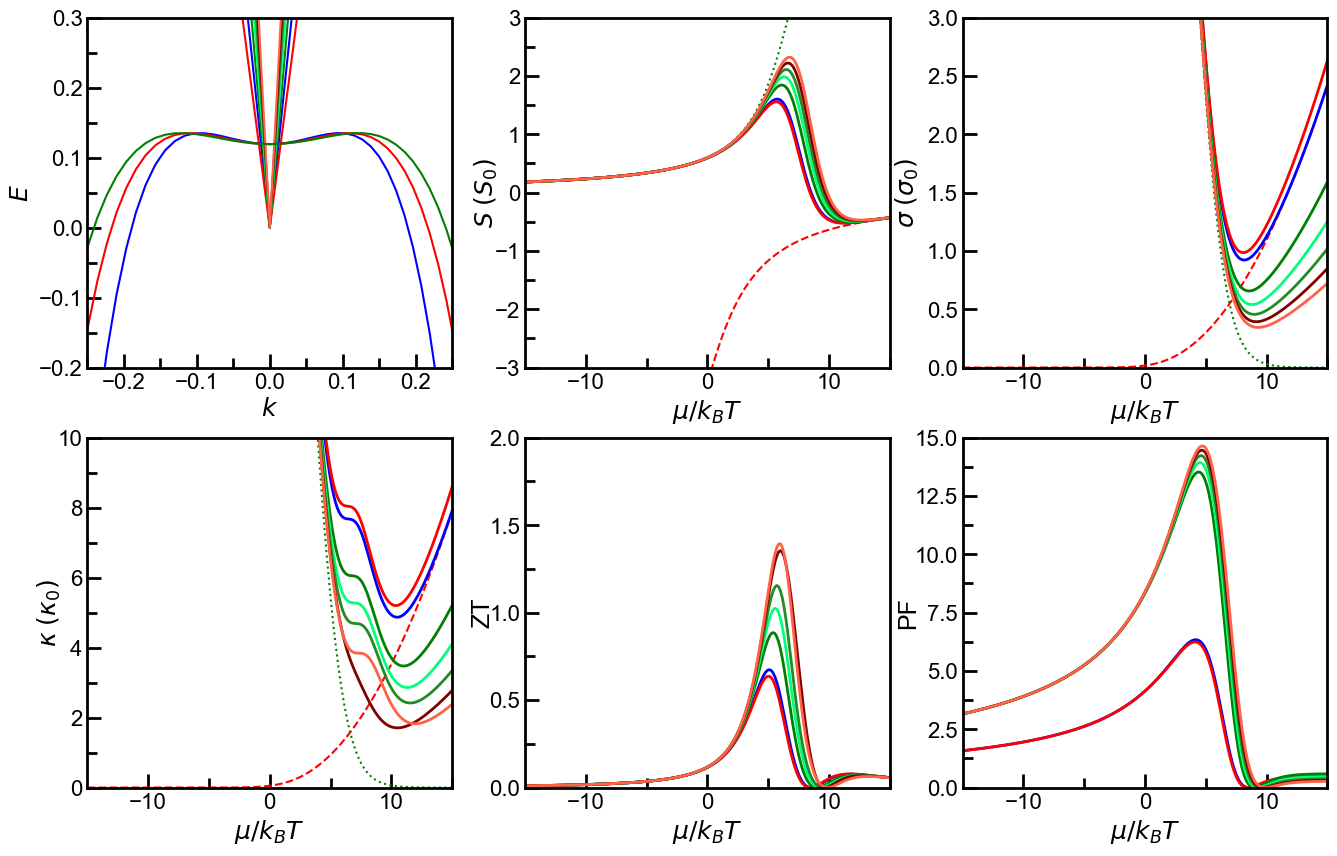

In [ ]:
# Define the size of the entire plot
plt.figure(figsize=(16,10))

npoint = 201
eta = linspace(-15, 15, npoint)  

kT = 0.026
alpha = v**2/(4*a)/(kBT)
#e1 = a**2/(4*b)/(kBT)
e1 = -(min(Ekcc) - max(Ekvv))/(kBT)
e0 = 0.135/kBT+e1
eshift = 0

#eta = eta + eshift

# Subplot (a) : Dispersion relation
ax1 = plt.subplot(2,3,1)
ax1.plot(kcc,fc, linestyle='solid', c='blue')
#ax1.plot(kcc,fc1, linestyle='solid', c='red')
#ax1.plot(kcc,fc2, linestyle='solid', c='green')
#ax1.plot(kcc,fc3, linestyle='solid', c='springgreen')
#ax1.plot(kcc,fc4, linestyle='solid', c='forestgreen')
#ax1.plot(kcc,fc5, linestyle='solid', color='maroon')
#ax1.plot(kcc,fc6, linestyle='solid', color='tomato')
#ax1.plot(kcc,fv+0.135, linestyle='solid', c='blue')
#ax1.plot(kcc,fv1+0.135, linestyle='solid', c='red')
#ax1.plot(kcc,fv2+0.135,linestyle='solid', c='green')
ax1.axis([-0.25,0.25,-0.2,0.3])
ax1.set_xlabel('$k$')
ax1.set_ylabel('$E$')

ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))
ax1.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))
ax1.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
ax1.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))
ax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax1.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
ax1.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax1.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in')

# Subplot (a): Seebeck's coefficient
#ax2 = plt.subplot(2,3,2)
#plt.plot(eta, S_c(eta+eshift,e0,e1), 'r--')
#plt.plot(eta, S_v(eta+eshift,e0,e1), 'g:')
#plt.plot(eta, S(eta+eshift,e0,e1), 'b-',linewidth=2)
#plt.plot(eta, S1(eta+eshift,e0,e1), linestyle='solid', c='red',linewidth=2)
#plt.plot(eta, S2(eta+eshift,e0,e1), linestyle='solid', c='green',linewidth=2)
#plt.plot(eta, S3(eta+eshift,e0,e1), linestyle='solid', color='springgreen', linewidth=2)
#plt.plot(eta, S4(eta+eshift,e0,e1), linestyle='solid', color='forestgreen', linewidth=2)
#plt.plot(eta, S5(eta+eshift,e0,e1), linestyle='solid', color='maroon', linewidth=2)
#plt.plot(eta, S6(eta+eshift,e0,e1), linestyle='solid', color='tomato', linewidth=2)
#plt.axis([-15,15,-3,3]) # the format is [xmin,xmax,ymin,ymax]
##plt.xticks(range(-8,9,4))
#ax2.xaxis.set_minor_locator(AutoMinorLocator(2))
#ax2.yaxis.set_minor_locator(AutoMinorLocator(2))
#ax2.yaxis.labelpad = -4
#plt.xlabel('$\mu/k_BT$')
#plt.ylabel('$S$ $(S_0)$')
##ax2.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
##ax2.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.25))
#ax2.xaxis.set_tick_params(which='major', size=10, width=2, direction='in')
#ax2.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
#ax2.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
#ax2.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
#
##Subplot (b) : Electrical conductivity
#ax3 = plt.subplot(2,3,3)
#plt.plot(eta, sigma_c(eta+eshift,e0,e1), 'r--')
#plt.plot(eta, sigma_v(eta+eshift,e0,e1), 'g:')
#plt.plot(eta, sigma(eta+eshift,e0,e1), 'b-',linewidth=2)
#plt.plot(eta, sigma1(eta+eshift,e0,e1), linestyle='solid', c='red',linewidth=2)
#plt.plot(eta, sigma2(eta+eshift,e0,e1), linestyle='solid', c='green',linewidth=2)
#plt.plot(eta, sigma3(eta+eshift,e0,e1), linestyle='solid', color='springgreen',linewidth=2)
#plt.plot(eta, sigma4(eta+eshift,e0,e1), linestyle='solid', color='forestgreen',linewidth=2)
#plt.plot(eta, sigma5(eta+eshift,e0,e1), linestyle='solid', color='maroon',linewidth=2)
#plt.plot(eta, sigma6(eta+eshift,e0,e1), linestyle='solid', color='tomato',linewidth=2)
#plt.axis([-15,15,0,3]) # the format is [xmin,xmax,ymin,ymax]
##plt.xticks(range(-8,9,4))
#ax3.xaxis.set_minor_locator(AutoMinorLocator(2))
##plt.yticks(range(-4,5,2))
##ax3.yaxis.set_minor_locator(AutoMinorLocator(2))
##ax3.yaxis.labelpad = -4
#plt.xlabel('$\mu/k_BT$')
#plt.ylabel('$\sigma$ $(\sigma_0)$')
##ax3.yaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
##ax3.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(2.5))
#ax3.xaxis.set_tick_params(which='major', size=10, width=2, direction='in')
#ax3.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
#ax3.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
#ax3.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
#
##Subplot (c) : Thermal conductivity
#ax4 = plt.subplot(2,3,4)
#plt.plot(eta, kappa_c(eta+eshift,e0,e1), 'r--')
#plt.plot(eta, kappa_v(eta+eshift,e0,e1), 'g:')
#plt.plot(eta, kappa(eta+eshift,e0,e1), 'b-',linewidth=2)
#plt.plot(eta, kappa1(eta+eshift,e0,e1), linestyle='solid', c='red',linewidth=2)
#plt.plot(eta, kappa2(eta+eshift,e0,e1), linestyle='solid', c='green',linewidth=2)
#plt.plot(eta, kappa3(eta+eshift,e0,e1), linestyle='solid', color='springgreen', linewidth=2)
#plt.plot(eta, kappa4(eta+eshift,e0,e1), linestyle='solid', color='forestgreen', linewidth=2)
#plt.plot(eta, kappa5(eta+eshift,e0,e1), linestyle='solid', color='maroon', linewidth=2)
#plt.plot(eta, kappa6(eta+eshift,e0,e1), linestyle='solid', color='tomato', linewidth=2)
#plt.axis([-15,15,0,10]) # the format is [xmin,xmax,ymin,ymax]
##plt.xticks(range(-8,9,4))
#ax4.xaxis.set_minor_locator(AutoMinorLocator(2))
##plt.yticks(range(-1,2,1))
#ax4.yaxis.set_minor_locator(AutoMinorLocator(2))
#ax4.yaxis.labelpad = -4
#plt.xlabel('$\mu/k_BT$')
#plt.ylabel('$\kappa$ $(\kappa_0)$')
##ax4.yaxis.set_major_locator(mpl.ticker.MultipleLocator(10))
##ax4.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))
#ax4.xaxis.set_tick_params(which='major', size=10, width=2, direction='in')
#ax4.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
#ax4.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
#ax4.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
#
##Subplot (d) : ZT
#ax5 = plt.subplot(2,3,5)
##rkapp1 = kappa(eta+eshift,e0,e1)/3
##rkapp2 = 3*kappa(eta+eshift,e0,e1)
#plt.plot(eta, ZT(eta+eshift,e0,e1), c='blue',linewidth=2)
#plt.plot(eta, ZT1(eta+eshift,e0,e1), c='red',linewidth=2)
#plt.plot(eta, ZT2(eta+eshift,e0,e1), c='green',linewidth=2)
#plt.plot(eta, ZT3(eta+eshift,e0,e1), c='springgreen',linewidth=2)
#plt.plot(eta, ZT4(eta+eshift,e0,e1), c='forestgreen',linewidth=2)
#plt.plot(eta, ZT5(eta+eshift,e0,e1), c='maroon',linewidth=2)
#plt.plot(eta, ZT6(eta+eshift,e0,e1), c='tomato',linewidth=2)
##plt.plot(eta, ZT(eta+eshift,e0,e1,rkapp1), c='teal',linewidth=2,label = r'$\kappa_{ph} = \frac{\kappa_e}{3}$' )
##plt.plot(eta, ZT(eta+eshift,e0,e1,rkapp2), c='crimson',linewidth=2,label = r'$\kappa_{ph} = 3\kappa_e$')
#plt.axis([-15,15,0, 2]) # the format is [xmin,xmax,ymin,ymax]
##plt.xticks(range(-8,9,4))
#ax5.xaxis.set_minor_locator(AutoMinorLocator(2))
##plt.yticks(range(0,3,0.5))
#ax5.yaxis.set_minor_locator(AutoMinorLocator(2))
#ax5.yaxis.labelpad = -4
#plt.xlabel('$\mu/k_BT$')
#plt.ylabel('ZT')
##plt.legend()
##ax5.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.25))
##ax5.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.125))
#ax5.xaxis.set_tick_params(which='major', size=10, width=2, direction='in')
#ax5.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
#ax5.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
#ax5.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
#
##Subplot (e) : Power Factor
#ax6 = plt.subplot(2,3,6)
#plt.plot(eta, S(eta+eshift,e0,e1)**2*sigma(eta+eshift,e0,e1), linestyle='solid', c='blue',linewidth=2)
#plt.plot(eta, S1(eta+eshift,e0,e1)**2*sigma1(eta+eshift,e0,e1), linestyle='solid', 
#         c='red',linewidth=2)
#plt.plot(eta, 2*S2(eta+eshift,e0,e1)**2*sigma2(eta+eshift,e0,e1), c='green',linewidth=2)
#plt.plot(eta, 2*S3(eta+eshift,e0,e1)**2*sigma3(eta+eshift,e0,e1), linestyle='solid', 
#         c='springgreen', linewidth=2)
#plt.plot(eta, 2*S4(eta+eshift,e0,e1)**2*sigma4(eta+eshift,e0,e1), linestyle='solid', 
#         c='forestgreen',linewidth=2)
#plt.plot(eta, 2*S5(eta+eshift,e0,e1)**2*sigma5(eta+eshift,e0,e1),  linestyle='solid', 
#         c='maroon',linewidth=2)
#plt.plot(eta, 2*S6(eta+eshift,e0,e1)**2*sigma6(eta+eshift,e0,e1), linestyle='solid', 
#         c='tomato',linewidth=2)
#plt.axis([-15,15,0,15]) # the format is [xmin,xmax,ymin,ymax]
##plt.xticks(range(-8,9,20))
#ax6.xaxis.set_minor_locator(AutoMinorLocator(2))
##plt.yticks(range(-4,5,2))
#ax6.yaxis.set_minor_locator(AutoMinorLocator(2))
#ax6.yaxis.labelpad = -4
#plt.xlabel('$\mu/k_BT$')
#plt.ylabel('PF')
##ax6.yaxis.set_major_locator(mpl.ticker.MultipleLocator(10))
##ax6.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))
#ax6.xaxis.set_tick_params(which='major', size=10, width=2, direction='in')
#ax6.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
#ax6.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
#ax6.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in')